In [342]:
""" Importing all the required libraries """

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option("display.max_columns", 52) # 45

In [343]:
all_seasons_summary_df = pd.read_csv("all_season_summary.csv")

In [344]:
seasons_summary_2024_df = pd.read_csv("season_summary.csv")

In [345]:
seasons_summary_2024_df.head(2)

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2024.0,1422119,Chennai Super Kings v Royal Challengers Bengaluru,CSK v RCB,"1st Match (N), Indian Premier League at Chenna...",CSK,RCB,RCB,BAT FIRST,173/6,176/4,176/4,173/6,CSK,CSK won by 6 wkts (8b rem),2024-03-22T14:30Z,2024-03-23T23:59Z,58008,"MA Chidambaram Stadium, Chepauk, Chennai",Ruturaj Gaikwad,Faf du Plessis,Mustafizur Rahman,"Chennai Super Kings 2, Royal Challengers Benga...",False,18.4,176.0,4.0,19.0,20.0,173.0,6.0,22.0,Mustafizur stars as Gaikwad's CSK start title ...,"Rachin Ravindra,Shivam Dube","Mustafizur Rahman,Deepak Chahar","Ruturaj Gaikwad (UKN),Rachin Ravindra (AR),Aji...","Virat Kohli (UKN),Faf du Plessis (UKN),Rajat P...","Anuj Rawat,Dinesh Karthik","Cameron Green,Karn Sharma",22 March 2024 - night match (20-over match),Saiyed Khalid,Virender Sharma,Nitin Menon,Javagal Srinath,Madanagopal Kuppuraj
1,2024.0,1422120,Punjab Kings v Delhi Capitals,PBKS v DC,"2nd Match (D/N), Indian Premier League at Moha...",PBKS,DC,KXIP,BOWL FIRST,174/9,177/6,177/6,174/9,PBKS,PBKS won by 4 wkts (4b rem),2024-03-23T10:00Z,2024-03-24T23:59Z,1290799,Maharaja Yadavindra Singh International Cricke...,Shikhar Dhawan,Rishabh Pant,Sam Curran,"Punjab Kings 2, Delhi Capitals 0",False,19.2,177.0,6.0,24.0,20.0,174.0,9.0,24.0,Sam Curran's 47-ball 63 gives Punjab Kings win...,"Sam Curran,Liam Livingstone","Arshdeep Singh,Harshal Patel","Shikhar Dhawan (UKN),Jonny Bairstow (UKN),Prab...","David Warner (UKN),Mitchell Marsh (AR),Shai Ho...","Shai Hope,Abishek Porel","Kuldeep Yadav,Khaleel Ahmed",23 March 2024 - day/night match (20-over match),Jayaraman Madanagopal,Nikhil Patwardhan,Alex Wharf,Narayanan Kutty,Pranav Joshi


In [346]:
combined_df = pd.concat([all_seasons_summary_df,seasons_summary_2024_df])

In [347]:
combined_df.shape

(1106, 45)

# Data Cleaning

# From the above we can see that data types of the columsn needs to be changes, we also need to check for 'NAN' or "Null's" in the data.

In [348]:
combined_df.isna().sum().sum()

854

In [349]:
combined_df.isnull().sum().sum()

854

In [350]:
combined_df[combined_df["season"].isna()] # isnull()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
21,NaN,1359496,Mumbai Indians v Kolkata Knight Riders,MI v KKR,"22nd Match (D/N), Indian Premier League at Mum...",KKR,MI,NaN,NaN,185,186,186/5,185/6,MI,Mumbai won by 5 wkts (14b rem),2023-04-16T10:00Z,2023-04-17T23:59Z,58324,"Wankhede Stadium, Mumbai",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,1359519,Lucknow Super Giants v Chennai Super Kings,LSG v CSK,"45th Match (D/N), Indian Premier League at Luc...",LSG,CSK,NaN,NaN,NaN,NaN,125/7,NaN,CSK,No result,2023-05-03T10:00Z,2023-05-04T23:59Z,1070094,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,1359538,Punjab Kings v Delhi Capitals,PBKS v DC,"64th Match (N), Indian Premier League at Dhara...",DC,PBKS,NaN,NaN,213/2,198/8,213/2,"198/8 (20 ov, target 214)",DC,Capitals won by 15 runs,2023-05-17T14:00Z,2023-05-18T23:59Z,58056,"Himachal Pradesh Cricket Association Stadium, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,1426298,Kolkata Knight Riders v Mumbai Indians,KKR v MI,"60th Match (N), Indian Premier League at Kolka...",KKR,MI,NaN,NaN,157/7,139/8,157/7,139/8,MI,Starts at 19:30 local time,2024-05-11T14:00Z,2024-05-12T23:59Z,57980,"Eden Gardens, Kolkata",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,1426299,Chennai Super Kings v Rajasthan Royals,CSK v RR,"61st Match (D/N), Indian Premier League at Che...",CSK,RR,NaN,NaN,141/5,145/5,145/5,141/5,RR,Starts at 15:30 local time,2024-05-12T10:00Z,2024-05-13T23:59Z,58008,"MA Chidambaram Stadium, Chepauk, Chennai",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,1426300,Royal Challengers Bengaluru v Delhi Capitals,RCB v DC,"62nd Match (N), Indian Premier League at Benga...",RCB,DC,NaN,NaN,187/9,140,187/9,140,RCB,RCB won by 47 runs,2024-05-12T14:00Z,2024-05-13T23:59Z,57897,"M.Chinnaswamy Stadium, Bengaluru",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,1426301,Gujarat Titans v Kolkata Knight Riders,GT v KKR,"63rd Match (N), Indian Premier League at Ahmed...",GT,KKR,NaN,NaN,NaN,NaN,NaN,NaN,KKR,Match abandoned without a ball bowled,2024-05-13T14:00Z,2024-05-14T23:59Z,57851,"Narendra Modi Stadium, Motera, Ahmedabad",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,1426302,Delhi Capitals v Lucknow Super Giants,DC v LSG,"64th Match (N), Indian Premier League at Delhi...",DC,LSG,NaN,NaN,208/4,189/9,208/4,189/9,LSG,DC won by 19 runs,2024-05-14T14:00Z,2024-05-15T23:59Z,58040,"Arun Jaitley Stadium, Delhi",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,1426303,Rajasthan Royals v Punjab Kings,RR v PBKS,"65th Match (N), Indian Premier League at Guwah...",RR,PBKS,NaN,NaN,144/9,145/5,144/9,145/5,PBKS,PBKS won by 5 wkts (7b rem),2024-05-15T14:00Z,2024-05-16T23:59Z,680295,"Barsapara Cricket Stadium, Guwahati",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,1426304,Sunrisers Hyderabad v Gujarat Titans,SRH v GT,"66th Match (N), Indian Premier League at Hyder...",SRH,GT,NaN,NaN,NaN,NaN,NaN,NaN,GT,Match abandoned without a ball bowled,2024-05-16T14:00Z,20

In [351]:
combined_df["year"]= combined_df["start_date"].str[:4]

In [352]:
combined_df["season"]= combined_df["season"].fillna(0).astype("int64")

In [353]:
combined_df["season"]= combined_df.apply(lambda x: x["year"] if x["season"]==0 else x["season"], axis=1)

In [354]:
combined_df.dtypes

season               object
id                    int64
name                 object
short_name           object
description          object
home_team            object
away_team            object
toss_won             object
decision             object
1st_inning_score     object
2nd_inning_score     object
home_score           object
away_score           object
winner               object
result               object
start_date           object
end_date             object
venue_id              int64
venue_name           object
home_captain         object
away_captain         object
pom                  object
points               object
super_over           object
home_overs          float64
home_runs           float64
home_wickets        float64
home_boundaries     float64
away_overs          float64
away_runs           float64
away_wickets        float64
away_boundaries     float64
highlights           object
home_key_batsman     object
home_key_bowler      object
home_playx1         

In [355]:
""" Converting the datatype of 'home_score' to integer and also extracting only the score part of it and removing wickets lost """
def home_convert(home_score):
    
    if str(home_score).lower() =="nan":
        home_score=0
        
    else:
        h_score = re.search(('\d+'),home_score).group()
        # print(h_score)
        return h_score
     
combined_df["h_score"] = combined_df["home_score"].apply(home_convert)

# combined_df[combined_df["h_score"].isnull()].head(2) #.isnull()

In [356]:
combined_df["h_score"] = combined_df["h_score"].apply(lambda x: 0 if x==None else x).astype("int64") # combined_df[combined_df["id"]==829755]

In [357]:
""" Converting the datatype of 'away_score' to integer and also extracting only the score part of it and removing wickets lost """

combined_df["a_score"] = combined_df["away_score"].apply(home_convert)

In [358]:
combined_df["a_score"] = combined_df["a_score"].apply(lambda x: 0 if x==None else x).astype("int64") 

In [359]:
""" Converting the datatype of '1st_inn_score' to integer and also extracting only the score part of it and removing wickets lost """

combined_df["1st_inn_score"]= combined_df["1st_inning_score"].apply(home_convert)

In [360]:
combined_df["1st_inn_score"] = combined_df["1st_inn_score"].apply(lambda x: 0 if x==None else x).astype("int64") 

In [361]:
combined_df["2nd_inn_score"]= combined_df["2nd_inning_score"].apply(home_convert)

In [362]:
combined_df["2nd_inn_score"] = combined_df["2nd_inn_score"].apply(lambda x: 0 if x==None else x).astype("int64") 

In [363]:
combined_df["start_dt"] = pd.to_datetime(combined_df['start_date'].str[:10],format="%Y-%m-%d")

combined_df["end_dt"] = pd.to_datetime(combined_df['end_date'].str[:10],format="%Y-%m-%d")

# Loading data from  all_season_batting_cards & season_batting_card in to a DataFrame.

In [364]:
df_all_season_batting = pd.read_csv("all_season_batting_card.csv")

In [365]:
df_2024_season_batting = pd.read_csv("season_batting_card.csv")

In [366]:
combined_df_batting = pd.concat([df_all_season_batting, df_2024_season_batting])

In [367]:
combined_df_batting.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16664 entries, 0 to 943
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           16664 non-null  int64  
 1   match_id         16664 non-null  int64  
 2   match_name       16664 non-null  object 
 3   home_team        16664 non-null  object 
 4   away_team        16664 non-null  object 
 5   venue            16664 non-null  object 
 6   city             16664 non-null  object 
 7   country          16664 non-null  object 
 8   current_innings  16664 non-null  object 
 9   innings_id       16664 non-null  int64  
 10  name             16664 non-null  object 
 11  fullName         16664 non-null  object 
 12  runs             16658 non-null  float64
 13  ballsFaced       16658 non-null  float64
 14  minutes          16658 non-null  object 
 15  fours            16658 non-null  float64
 16  sixes            16658 non-null  float64
 17  strikeRate       16

In [368]:
combined_df_batting[combined_df_batting["match_id"]==1426306].head(2)

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,name,fullName,runs,ballsFaced,minutes,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
928,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,RCB,1,V Kohli,Virat Kohli,47.0,29.0,39,3.0,6.0,162.06,False,False,"{'wickets': 1, 'runs': 78}",9.4,NaN,NaN,NaN
929,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,RCB,1,F du Plessis,Faf du Plessis,54.0,39.0,54,3.0,3.0,138.46,True,False,"{'wickets': 2, 'runs': 113}",12.6,NaN,NaN,NaN


In [369]:
# combined_df_batting[combined_df_batting["match_id"]==1426306] # RCB v CSK

combined_df_batting[combined_df_batting["match_name"]=="CSK v RCB"]

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,name,fullName,runs,ballsFaced,minutes,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
1508,2022,1304068,CSK v RCB,CSK,RCB,"Dr DY Patil Sports Academy, Navi Mumbai",Navi Mumbai,India,CSK,1,RD Gaikwad,Ruturaj Gaikwad,17.0,16.0,19,3.0,0.0,106.25,False,False,"{'wickets': 1, 'runs': 19}",3.4,lbw b Hazlewood,Gaikwad is ruled out lbw. Height the factor? H...,NaN
1509,2022,1304068,CSK v RCB,CSK,RCB,"Dr DY Patil Sports Academy, Navi Mumbai",Navi Mumbai,India,CSK,1,RV Uthappa,Robin Uthappa,88.0,50.0,98,4.0,9.0,176,False,False,"{'wickets': 3, 'runs': 201}",18.5,c Kohli b de Silva,Finally a wicket for RCB and Hasaranga! <stron...,NaN
1510,2022,1304068,CSK v RCB,CSK,RCB,"Dr DY Patil Sports Academy, Navi Mumbai",Navi Mumbai,India,CSK,1,MM Ali,Moeen Ali,3.0,8.0,16,0.0,0.0,37.5,False,False,"{'wickets': 2, 'runs': 36}",6.4,run out (Prabhudessai/&dagger;Karthik),<strong>Sensational fielding display. Suyash P...,NaN
1511,2022,1304068,CSK v RCB,CSK,RCB,"Dr DY Patil Sports Academy, Navi Mumbai",Navi Mumbai,India,CSK,1,S Dube,Shivam Dube,95.0,46.0,73,5.0,8.0,206.52,False,True,{},NaN,not out,NaN,NaN
1512,2022,1304068,CSK v RCB,CSK,RCB,"Dr DY Patil Sports Academy, Navi Mumbai",Navi Mumbai,India,CSK,1,RA Jadeja,Ravindra Jadeja,0.0,1.0,2,0.0,0.0,0,True,False,"{'wickets': 4, 'runs': 201}",18.6,c Anuj Rawat b de Silva,Just a one-ball stay for the skipper. <strong>...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,2024,1422119,CSK v RCB,CSK,RCB,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,India,CSK,2,R Ravindra,Rachin Ravindra,37.0,15.0,33,3.0,3.0,246.66,False,False,"{'wickets': 2, 'runs': 71}",6.6,c Patidar b Sharma,He's gone now! One shot too many for Rachin. W...,NaN
9,2024,1422119,CSK v RCB,CSK,RCB,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,India,CSK,2,AM Rahane,Ajinkya Rahane,27.0,19.0,26,0.0,2.0,142.1,False,False,"{'wickets': 3, 'runs': 99}",10.2,c Maxwell b Green,<strong>Excellent catch by Maxwell at square l...,NaN
10,2024,1422119,CSK v RCB,CSK,RCB,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,India,CSK,2,DJ Mitchell,Daryl Mitchell,22.0,18.0,23,0.0,2.0,122.22,False,False,"{'wickets': 4, 'runs': 110}",12.3,c Patidar b Green,<b>The short ball does the trick for Green!</b...,NaN
11,2024,1422119,CSK v RCB,CSK,RCB,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,India,CSK,2,S Dube,Shivam Dube,34.0,28.0,43,4.0,1.0,121.42,False,True,{},NaN,not out,NaN,NaN


In [370]:
combined_df_batting.to_csv("IPL-2023-2024-batting.csv")

In [371]:
combined_df[combined_df["id"]==1426306]

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,year,h_score,a_score,1st_inn_score,2nd_inn_score,start_dt,end_dt
67,2024,1426306,Royal Challengers Bengaluru v Chennai Super Kings,RCB v CSK,"68th Match (N), Indian Premier League at Benga...",RCB,CSK,NaN,NaN,218/5,191/7,218/5,191/7,CSK,RCB won by 27 runs,2024-05-18T14:00Z,2024-05-19T23:59Z,57897,"M.Chinnaswamy Stadium, Bengaluru",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,218,191,218,191,2024-05-18,2024-05-19


# Cleaned and Changed the data types of the columns 

# Would like to check below from the data available for SRH, CSK, RCB

# 1. Max number of run they scored in 20 overs at home and away
# 2. Runs Scored in Power play, check the average as well.
# 3. How many runs scored by the key players in the team
# 4. Number of Dot balls played by a players and boundaries they scored


In [372]:
combined_df[combined_df["season"]==2023].head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,year,h_score,a_score,1st_inn_score,2nd_inn_score,start_dt,end_dt
0,2023,1359475,Gujarat Titans v Chennai Super Kings,GT v CSK,"1st Match (N), Indian Premier League at Ahmeda...",GT,CSK,GT,BOWL FIRST,178/7,182/5,182/5,178/7,GT,Titans won by 5 wkts (4b rem),2023-03-31T14:00Z,2023-04-01T23:59Z,57851,"Narendra Modi Stadium, Motera, Ahmedabad",Hardik Pandya,MS Dhoni,Rashid Khan,"Gujarat Titans 2, Chennai Super Kings 0",False,19.2,182.0,5.0,23.0,20.0,178.0,7.0,23.0,"Gill, Rashid lead defending champions Gujarat ...","Shubman Gill,Vijay Shankar","Rashid Khan,Mohammed Shami","Wriddhiman Saha (WK),Shubman Gill (UKN),Sai Su...","Devon Conway (UKN),Ruturaj Gaikwad (UKN),Moeen...","Ruturaj Gaikwad,Moeen Ali","Rajvardhan Hangargekar,Ravindra Jadeja",31 March 2023 - night match (20-over match),Saiyed Khalid,Nitin Menon,Virender Sharma,Javagal Srinath,Abhijit Bengeri,2023,182,178,178,182,2023-03-31,2023-04-01
1,2023,1359476,Punjab Kings v Kolkata Knight Riders,PBKS v KKR,"2nd Match (D/N), Indian Premier League at Chan...",PBKS,KKR,KKR,BOWL FIRST,191/5,146/7,191/5,146/7,PBKS,Punjab Kings won by 7 runs (DLS),2023-04-01T10:00Z,2023-04-02T23:59Z,57991,"Punjab Cricket Association IS Bindra Stadium, ...",Shikhar Dhawan,Nitish Rana,Arshdeep Singh,"Punjab Kings 2, Kolkata Knight Riders 0",False,20.0,191.0,5.0,26.0,16.0,146.0,7.0,20.0,"Arshdeep, Rajapaksa lead Punjab Kings to victo...","Bhanuka Rajapaksa,Shikhar Dhawan","Arshdeep Singh,Rahul Chahar","Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),B...","Mandeep Singh (AR),Rahmanullah Gurbaz (WK),Anu...","Andre Russell,Venkatesh Iyer","Tim Southee,Varun Chakravarthy",01 April 2023 - day/night match (20-over match),Yeshwant Barde,Bruce Oxenford,Jayaraman Madanagopal,Manu Nayyar,Pranav Joshi,2023,191,146,191,146,2023-04-01,2023-04-02
2,2023,1359477,Lucknow Super Giants v Delhi Capitals,LSG v DC,"3rd Match (N), Indian Premier League at Luckno...",LSG,DC,DC,BOWL FIRST,193/6,143/9,193/6,143/9,LSG,Super Giants won by 50 runs,2023-04-01T14:00Z,2023-04-02T23:59Z,1070094,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,KL Rahul,David Warner,Mark Wood,"Lucknow Super Giants 2, Delhi Capitals 0",False,20.0,193.0,6.0,21.0,20.0,143.0,9.0,17.0,"Wood five-for, Mayers 73 stud Super Giants' wi...","Kyle Mayers,Nicholas Pooran","Mark Wood,Avesh Khan","KL Rahul (UKN),Kyle Mayers (AR),Deepak Hooda (...","Prithvi Shaw (UKN),David Warner (UKN),Mitchell...","David Warner,Rilee Rossouw","Khaleel Ahmed,Chetan Sakariya",01 April 2023 - night match (20-over match),Anil Chaudhary,Nikhil Patwardhan,Sadashiv Iyer,Daniel Manohar,Madanagopal Kuppuraj,2023,193,143,193,143,2023-04-01,2023-04-02
3,2023,1359478,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"4th Match (D/N), Indian Premier League at Hyde...",SRH,RR,SRH,BOWL FIRST,203/5,131/8,131/8,203/5,RR,Royals won by 72 runs,2023-04-02T10:00Z,2023-04-03T23:59Z,58142,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Bhuvneshwar Kumar,Sanju Samson,Jos Buttler,"Rajasthan Royals 2, Sunrisers Hyderabad 0",False,20.0,131.0,8.0,13.0,20.0,203.0,5.0,29.0,Buttler and Boult trigger demolition of Sunris...,"Abdul Samad,Mayank Agarwal","T Natarajan,Fazalhaq Farooqi","Abhishek Sharma (AR),Mayank Agarwal (UKN),Rahu...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Sanju...","Sanju Samson,Yashasvi Jaiswal","Yuzvendra Chahal,Trent Boult",02 April 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rohan Pandit,Navdeep Singh,Narayanan Kutty,Abhijit Bhattacharya,2023,131,203,203,131,2023-04-02,2023-04-03
4,202

In [373]:
combined_df[(combined_df["short_name"]=="RCB v CSK") & (combined_df["season"]==2023)]

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,year,h_score,a_score,1st_inn_score,2nd_inn_score,start_dt,end_dt
23,2023,1359498,Royal Challengers Bangalore v Chennai Super Kings,RCB v CSK,"24th Match (N), Indian Premier League at Benga...",RCB,CSK,RCB,BOWL FIRST,226/6,218/8,218/8,226/6,CSK,Super Kings won by 8 runs,2023-04-17T14:00Z,2023-04-18T23:59Z,57897,"M.Chinnaswamy Stadium, Bengaluru",Faf du Plessis,MS Dhoni,Devon Conway,"Chennai Super Kings 2, Royal Challengers Banga...",False,20.0,218.0,8.0,28.0,20.0,226.0,6.0,29.0,Chennai Super Kings win run-fest despite Maxwe...,"Glenn Maxwell,Faf du Plessis","Wanindu Hasaranga,Glenn Maxwell","Virat Kohli (UKN),Faf du Plessis (UKN),Mahipal...","Ruturaj Gaikwad (UKN),Devon Conway (UKN),Ajink...","Devon Conway,Shivam Dube","Tushar Deshpande,Matheesha Pathirana",17 April 2023 - night match (20-over match),KN Ananthapadmanabhan,Navdeep Singh,Michael Gough,Amit Sharma,Abhijit Bhattacharya,2023,218,226,226,218,2023-04-17,2023-04-18


In [374]:

combined_df[(combined_df["short_name"]=="RCB v CSK") & (combined_df["season"]=="2024")]

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,year,h_score,a_score,1st_inn_score,2nd_inn_score,start_dt,end_dt
67,2024,1426306,Royal Challengers Bengaluru v Chennai Super Kings,RCB v CSK,"68th Match (N), Indian Premier League at Benga...",RCB,CSK,NaN,NaN,218/5,191/7,218/5,191/7,CSK,RCB won by 27 runs,2024-05-18T14:00Z,2024-05-19T23:59Z,57897,"M.Chinnaswamy Stadium, Bengaluru",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,218,191,218,191,2024-05-18,2024-05-19


In [375]:
combined_df[(combined_df["short_name"]=="CSK v RCB") & (combined_df["season"]==2024)]

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,year,h_score,a_score,1st_inn_score,2nd_inn_score,start_dt,end_dt
0,2024,1422119,Chennai Super Kings v Royal Challengers Bengaluru,CSK v RCB,"1st Match (N), Indian Premier League at Chenna...",CSK,RCB,RCB,BAT FIRST,173/6,176/4,176/4,173/6,CSK,CSK won by 6 wkts (8b rem),2024-03-22T14:30Z,2024-03-23T23:59Z,58008,"MA Chidambaram Stadium, Chepauk, Chennai",Ruturaj Gaikwad,Faf du Plessis,Mustafizur Rahman,"Chennai Super Kings 2, Royal Challengers Benga...",False,18.4,176.0,4.0,19.0,20.0,173.0,6.0,22.0,Mustafizur stars as Gaikwad's CSK start title ...,"Rachin Ravindra,Shivam Dube","Mustafizur Rahman,Deepak Chahar","Ruturaj Gaikwad (UKN),Rachin Ravindra (AR),Aji...","Virat Kohli (UKN),Faf du Plessis (UKN),Rajat P...","Anuj Rawat,Dinesh Karthik","Cameron Green,Karn Sharma",22 March 2024 - night match (20-over match),Saiyed Khalid,Virender Sharma,Nitin Menon,Javagal Srinath,Madanagopal Kuppuraj,2024,176,173,173,176,2024-03-22,2024-03-23


In [376]:
combined_df_batting.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16664 entries, 0 to 943
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           16664 non-null  int64  
 1   match_id         16664 non-null  int64  
 2   match_name       16664 non-null  object 
 3   home_team        16664 non-null  object 
 4   away_team        16664 non-null  object 
 5   venue            16664 non-null  object 
 6   city             16664 non-null  object 
 7   country          16664 non-null  object 
 8   current_innings  16664 non-null  object 
 9   innings_id       16664 non-null  int64  
 10  name             16664 non-null  object 
 11  fullName         16664 non-null  object 
 12  runs             16658 non-null  float64
 13  ballsFaced       16658 non-null  float64
 14  minutes          16658 non-null  object 
 15  fours            16658 non-null  float64
 16  sixes            16658 non-null  float64
 17  strikeRate       16

In [377]:
combined_df_batting[combined_df_batting["match_id"]==1426306].head(8)

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,name,fullName,runs,ballsFaced,minutes,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
928,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,RCB,1,V Kohli,Virat Kohli,47.0,29.0,39,3.0,6.0,162.06,False,False,"{'wickets': 1, 'runs': 78}",9.4,NaN,NaN,NaN
929,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,RCB,1,F du Plessis,Faf du Plessis,54.0,39.0,54,3.0,3.0,138.46,True,False,"{'wickets': 2, 'runs': 113}",12.6,NaN,NaN,NaN
930,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,RCB,1,RM Patidar,Rajat Patidar,41.0,23.0,45,2.0,4.0,178.26,False,False,"{'wickets': 3, 'runs': 184}",17.4,NaN,NaN,NaN
931,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,RCB,1,C Green,Cameron Green,38.0,17.0,45,3.0,3.0,223.52,False,True,{},{},NaN,NaN,NaN
932,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,RCB,1,KD Karthik,Dinesh Karthik,14.0,6.0,8,1.0,1.0,233.33,False,False,"{'wickets': 4, 'runs': 210}",18.5,NaN,NaN,NaN
933,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,RCB,1,GJ Maxwell,Glenn Maxwell,16.0,5.0,5,2.0,1.0,320,False,False,"{'wickets': 5, 'runs': 218}",19.5,NaN,NaN,NaN
934,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,RCB,1,MK Lomror,Mahipal Lomror,0.0,1.0,1,0.0,0.0,0,False,False,{},20,NaN,NaN,NaN
935,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,RD Gaikwad,Ruturaj Gaikwad,0.0,1.0,1,0.0,0.0,0,True,False,"{'wickets': 1, 'runs': 0}",0.1,NaN,NaN,NaN


In [378]:
CSK_2024_df = combined_df_batting[(combined_df_batting["season"]==2024) & (combined_df_batting["match_name"]=="RCB v CSK") & (combined_df_batting["current_innings"]=="CSK")]

In [379]:
CSK_2024_df

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,name,fullName,runs,ballsFaced,minutes,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
935,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,RD Gaikwad,Ruturaj Gaikwad,0.0,1.0,1,0.0,0.0,0,True,False,"{'wickets': 1, 'runs': 0}",0.1,NaN,NaN,NaN
936,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,R Ravindra,Rachin Ravindra,61.0,37.0,63,5.0,3.0,164.86,False,False,"{'wickets': 4, 'runs': 115}",12.6,NaN,NaN,NaN
937,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,DJ Mitchell,Daryl Mitchell,4.0,6.0,11,0.0,0.0,66.66,False,False,"{'wickets': 2, 'runs': 19}",2.2,NaN,NaN,NaN
938,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,AM Rahane,Ajinkya Rahane,33.0,22.0,32,3.0,1.0,150,False,False,"{'wickets': 3, 'runs': 85}",9.1,NaN,NaN,NaN
939,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,SB Dubey,Shivam Dube,7.0,15.0,20,0.0,0.0,46.66,False,False,"{'wickets': 5, 'runs': 119}",13.4,NaN,NaN,NaN
940,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,RA Jadeja,Ravindra Jadeja,42.0,22.0,42,3.0,3.0,190,False,True,{},{},NaN,NaN,NaN
941,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,MJ Santner,Mitchell Santner,3.0,4.0,7,0.0,0.0,75,False,False,"{'wickets': 6, 'runs': 129}",14.6,NaN,NaN,NaN
942,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,MS Dhoni,MS Dhoni,25.0,13.0,25,3.0,1.0,192.3,False,False,"{'wickets': 7, 'runs': 190}",19.2,NaN,NaN,NaN
943,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,SN Thakur,Shardul Thakur,1.0,2.0,3,0.0,0.0,50,False,True,{},20,NaN,NaN,NaN


In [450]:
def score(runningScore):
    runs_dict = eval(runningScore)
    if len(runs_dict)!=0:
        return runs_dict['runs']
    else:
        return ''
    
CSK_2024_df['Totalscore'] = CSK_2024_df["runningScore"].apply(score)

CSK_2024_df

/var/folders/rv/7081c9ws011__m65sb36mhs00000gq/T/ipykernel_31199/2104863030.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CSK_2024_df['Totalscore'] = CSK_2024_df["runningScore"].apply(score)


,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,name,fullName,runs,ballsFaced,minutes,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link,Totalscore
935,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,RD Gaikwad,Ruturaj Gaikwad,0.0,1.0,1,0.0,0.0,0,True,False,"{'wickets': 1, 'runs': 0}",0.1,NaN,NaN,NaN,0
936,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,R Ravindra,Rachin Ravindra,61.0,37.0,63,5.0,3.0,164.86,False,False,"{'wickets': 4, 'runs': 115}",12.6,NaN,NaN,NaN,115
937,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,DJ Mitchell,Daryl Mitchell,4.0,6.0,11,0.0,0.0,66.66,False,False,"{'wickets': 2, 'runs': 19}",2.2,NaN,NaN,NaN,19
938,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,AM Rahane,Ajinkya Rahane,33.0,22.0,32,3.0,1.0,150,False,False,"{'wickets': 3, 'runs': 85}",9.1,NaN,NaN,NaN,85
939,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,SB Dubey,Shivam Dube,7.0,15.0,20,0.0,0.0,46.66,False,False,"{'wickets': 5, 'runs': 119}",13.4,NaN,NaN,NaN,119
940,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,RA Jadeja,Ravindra Jadeja,42.0,22.0,42,3.0,3.0,190,False,True,{},{},NaN,NaN,NaN,
941,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,MJ Santner,Mitchell Santner,3.0,4.0,7,0.0,0.0,75,False,False,"{'wickets': 6, 'runs': 129}",14.6,NaN,NaN,NaN,129
942,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,MS Dhoni,MS Dhoni,25.0,13.0,25,3.0,1.0,192.3,False,False,"{'wickets': 7, 'runs': 190}",19.2,NaN,NaN,NaN,190
943,2024,1426306,RCB v CSK,RCB,CSK,"M Chinnaswamy Stadium, Bengaluru",Bengaluru,India,CSK,2,SN Thakur,Shardul Thakur,1.0,2.0,3,0.0,0.0,50,False,True,{},20,NaN,NaN,NaN,


In [452]:
CSK_2024_df["runningOver"]


935     0.1
936    12.6
937     2.2
938     9.1
939    13.4
940      {}
941    14.6
942    19.2
943      20
Name: runningOver, dtype: object

<Axes: xlabel='home_overs', ylabel='h_score'>

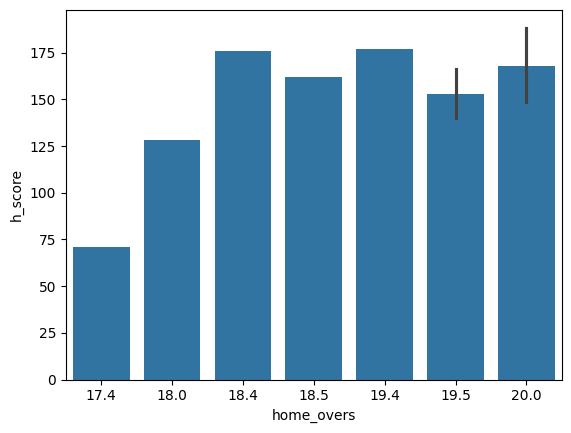

In [ ]:
sns.barplot(x=CSK_2024_df["runningOver"],y="h_score", data=data_group[data_group["home_team"]=="CSK"])

# print(type(data_group))


In [381]:
combined_df[combined_df["id"]== 1370350]  # 1359496 1359538 1359519

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,year,h_score,a_score,1st_inn_score,2nd_inn_score,start_dt,end_dt
70,2023,1370350,Chennai Super Kings v Gujarat Titans,CSK v GT,"Qualifier 1 (N), Indian Premier League at Chen...",CSK,GT,GT,BOWL FIRST,172/7,157,172/7,157,CSK,Super Kings won by 15 runs,2023-05-23T14:00Z,2023-05-24T23:59Z,58008,"MA Chidambaram Stadium, Chepauk, Chennai",MS Dhoni,Hardik Pandya,Ruturaj Gaikwad,NaN,False,20.0,172.0,7.0,18.0,20.0,157.0,10.0,18.0,CSK squeeze the Titans to enter their tenth IP...,"Ruturaj Gaikwad,Devon Conway","Ravindra Jadeja,Maheesh Theekshana","Ruturaj Gaikwad (UKN),Devon Conway (UKN),Shiva...","Wriddhiman Saha (WK),Shubman Gill (UKN),Hardik...","Shubman Gill,Rashid Khan","Mohammed Shami,Mohit Sharma",23 May 2023 - night match (20-over match),Anil Chaudhary,Chris Gaffaney,Bruce Oxenford,Manu Nayyar,Virender Sharma,2023,172,157,172,157,2023-05-23,2023-05-24


In [454]:
combined_df[combined_df["id"]== 1359538] 

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,year,h_score,a_score,1st_inn_score,2nd_inn_score,start_dt,end_dt
63,2023,1359538,Punjab Kings v Delhi Capitals,PBKS v DC,"64th Match (N), Indian Premier League at Dhara...",DC,PBKS,NaN,NaN,213/2,198/8,213/2,"198/8 (20 ov, target 214)",DC,Capitals won by 15 runs,2023-05-17T14:00Z,2023-05-18T23:59Z,58056,"Himachal Pradesh Cricket Association Stadium, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,213,198,213,198,2023-05-17,2023-05-18
